In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve



In [10]:
data = pd.read_csv(r'd:\ds\projects\restaurant purchase\restaurant purchase prediction.csv')

# EDA

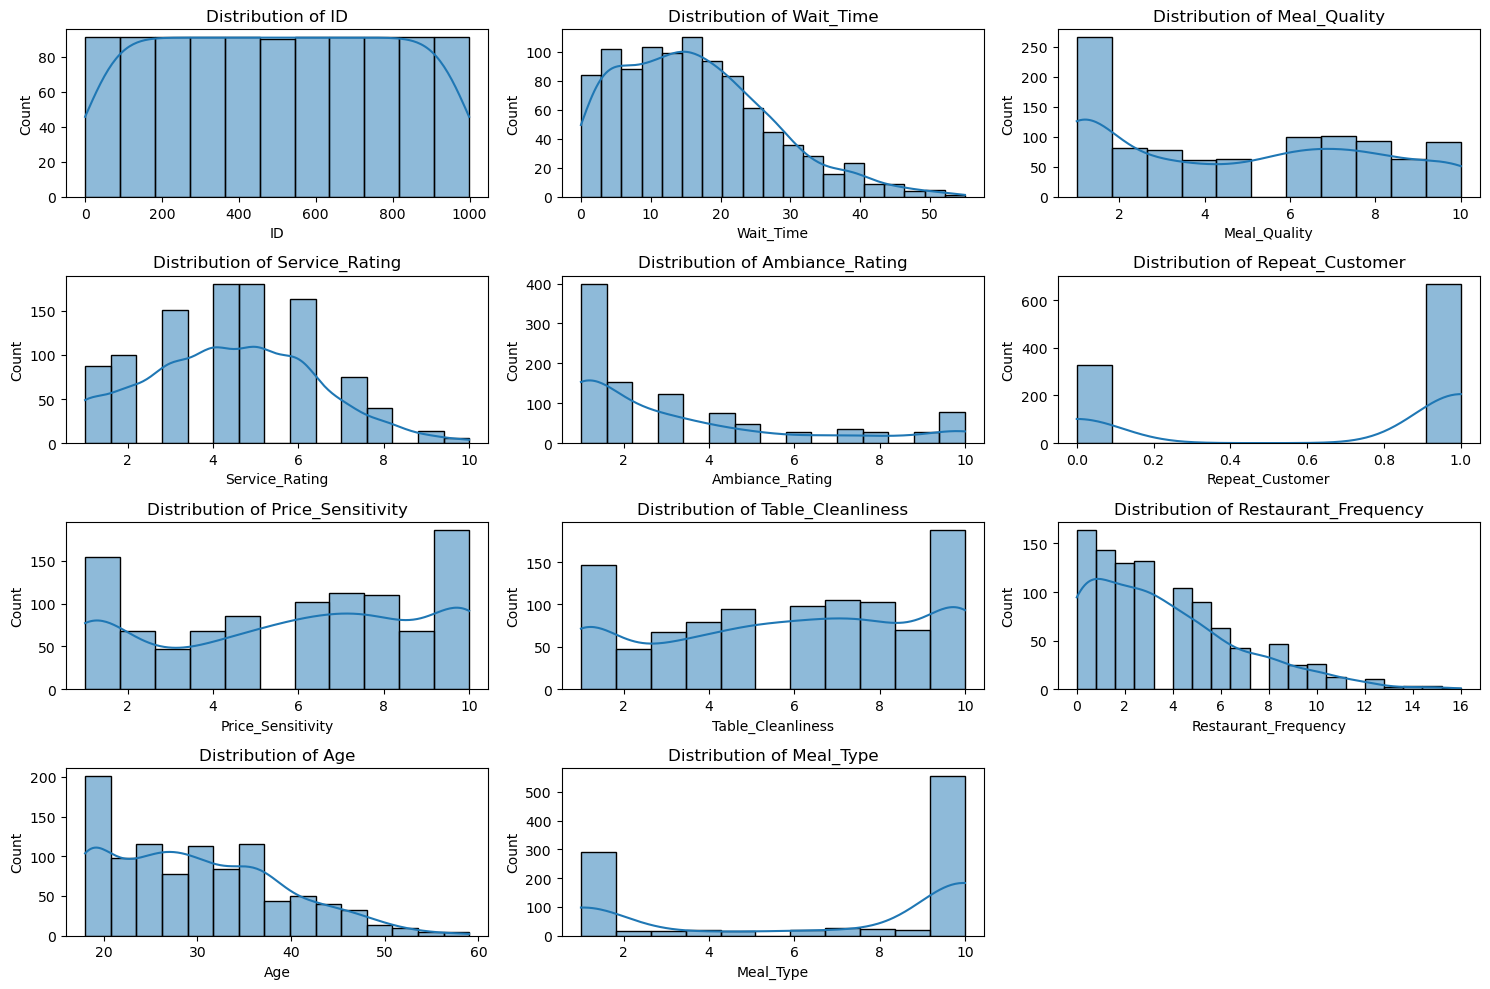

In [11]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(4, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


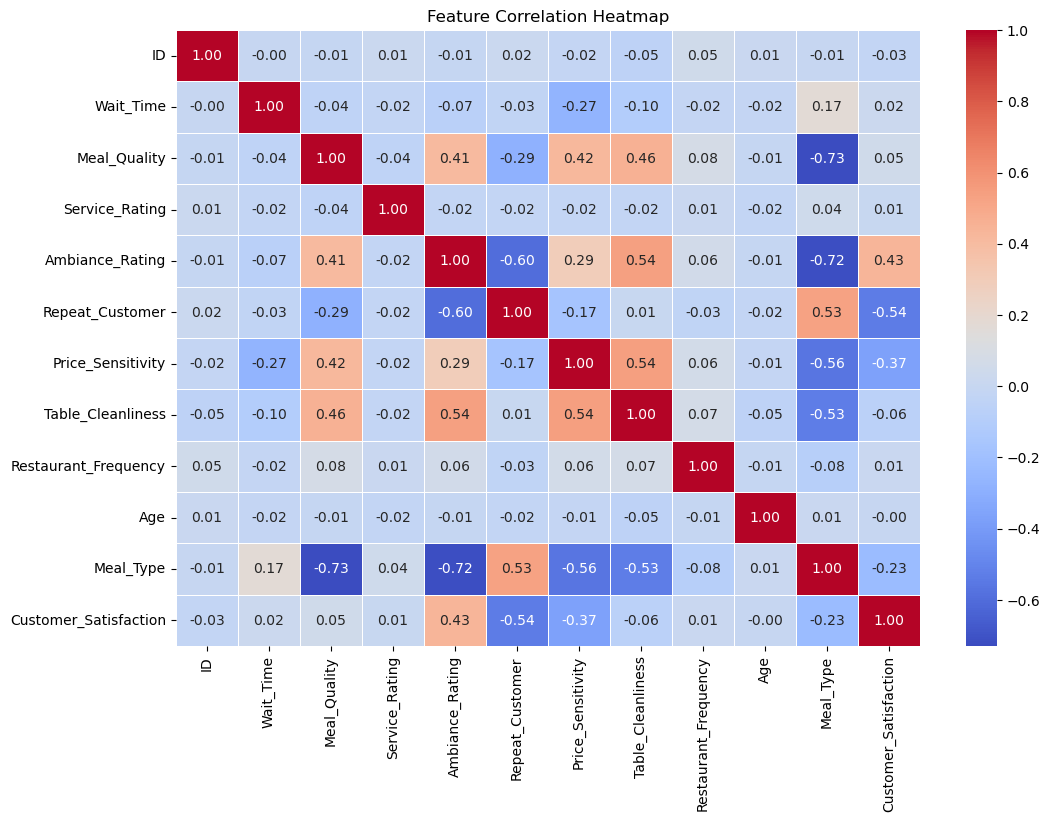

Correlation ba Customer Satisfaction:
 Customer_Satisfaction    1.000000
Ambiance_Rating          0.432898
Meal_Quality             0.049863
Wait_Time                0.023993
Restaurant_Frequency     0.009393
Service_Rating           0.006415
Age                     -0.003207
ID                      -0.026705
Table_Cleanliness       -0.063695
Meal_Type               -0.227478
Price_Sensitivity       -0.369515
Repeat_Customer         -0.535980
Name: Customer_Satisfaction, dtype: float64


In [12]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


print("Correlation ba Customer Satisfaction:\n", correlation_matrix['Customer_Satisfaction'].sort_values(ascending=False))


# Cross validation

In [13]:
X = data.drop(columns='Customer_Satisfaction')
y = data['Customer_Satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [23]:
import warnings
warnings.filterwarnings('always')

In [24]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "XGBoost": XGBClassifier() 
}


cv_scores = {name: cross_val_score(model, X_train, y_train, cv=5).mean() for name, model in models.items()}
print("Cross-validation scores for each model:\n", cv_scores)


C:\Users\mahbod.k\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mahbod.k\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

Cross-validation scores for each model:
 {'Logistic Regression': 0.8114285714285714, 'Random Forest': 0.9085714285714286, 'SVM': 0.54, 'K-Nearest Neighbors': 0.55, 'Gradient Boosting': 0.9214285714285715, 'AdaBoost': 0.8714285714285713, 'Extra Trees': 0.9214285714285714, 'XGBoost': 0.9114285714285714}


In [15]:

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print("Best parameters found for Random Forest:\n", grid_search.best_params_)


Best parameters found for Random Forest:
 {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 150}


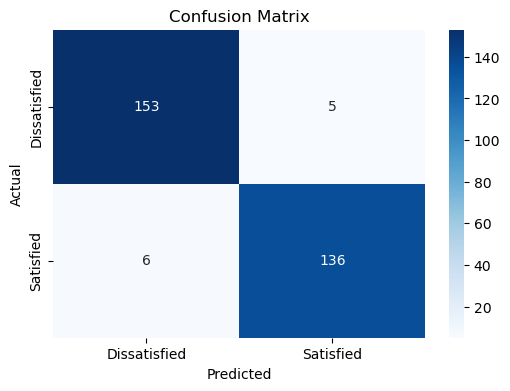

In [16]:
y_pred = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Dissatisfied', 'Satisfied'], yticklabels=['Dissatisfied', 'Satisfied'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [19]:
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       158
           1       0.96      0.96      0.96       142

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



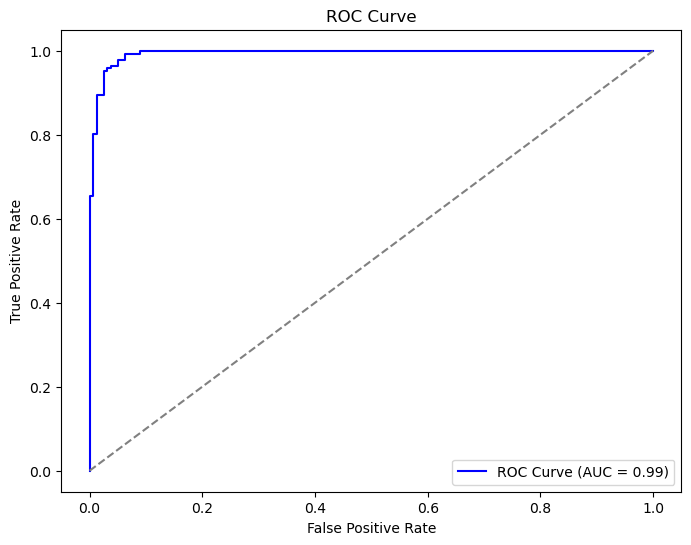

In [20]:
y_pred_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
